In [36]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

In [37]:
df = pd.read_csv("breast-cancer.csv.xls")

In [38]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [39]:
df.isna().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [40]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
281    False
282    False
283    False
284    False
285    False
Length: 286, dtype: bool

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [42]:
x = df[['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad']] #Feature
y = df["irradiat"] #Target

# ENCODING DATA

In [43]:
x = pd.get_dummies(x)

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
O = LabelEncoder()

In [46]:
y = O.fit_transform(y)

# SPLIT DATA

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [48]:
print(f'panjang x train : {len(x_train)}\n',
f'panjang y train : {len(y_train)}\n',
f'panjang x test : {len(x_test)}\n',
f'panjang y test : {len(y_test)}\n')

panjang x train : 200
 panjang y train : 200
 panjang x test : 86
 panjang y test : 86



In [49]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   deg-malig              286 non-null    int64
 1   age_20-29              286 non-null    uint8
 2   age_30-39              286 non-null    uint8
 3   age_40-49              286 non-null    uint8
 4   age_50-59              286 non-null    uint8
 5   age_60-69              286 non-null    uint8
 6   age_70-79              286 non-null    uint8
 7   menopause_ge40         286 non-null    uint8
 8   menopause_lt40         286 non-null    uint8
 9   menopause_premeno      286 non-null    uint8
 10  tumor-size_0-4         286 non-null    uint8
 11  tumor-size_10-14       286 non-null    uint8
 12  tumor-size_15-19       286 non-null    uint8
 13  tumor-size_20-24       286 non-null    uint8
 14  tumor-size_25-29       286 non-null    uint8
 15  tumor-size_30-34       286 non-null    u

# Data standarisasi

In [50]:
ss = StandardScaler()

In [51]:
x_scaled_train = ss.fit_transform(x_train)
x_scaled_test = ss.fit_transform(x_test)

In [52]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

# MEMBUAT MODEL

In [53]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()

#Input Layer
model.add(Dense(50, activation='relu', input_dim=39))

#Output Layer
model.add(Dense(2, activation='sigmoid')) #output layer harus disamakan dengan jumlah class, semakin banyak jumlah neuron semakin kompleks modelnya jadi bisa overfitting

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                2000      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2,102
Trainable params: 2,102
Non-trainable params: 0
_________________________________________________________________


# Import Library

In [54]:
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

# Mengoptimasi Model

In [55]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='accuracy', #dilihat berdasarkan validasi accuracy atau accuracy saja, tetapi monitor hanya bisa memasukkan 1 saja
                                patience=20)#jadi jika di 20 epoch selanjutnya itu tidak berubah maka diberentikan


In [56]:
model.compile(
    optimizer=Adam(),
    loss = binary_crossentropy,
    metrics = ['accuracy']
)

# Melatih model training

In [57]:
history = model.fit(
    x = x_scaled_train, 
    y = y_train,
    validation_data=(x_scaled_test,y_test),
    epochs=120,
    verbose=1,
    callbacks=[monitor_val_acc]
)

Epoch 1/120
7/7 [==============================] - 1s 26ms/step - loss: 0.6389 - accuracy: 0.7350 - val_loss: 0.6031 - val_accuracy: 0.7791
Epoch 2/120
7/7 [==============================] - 0s 7ms/step - loss: 0.5973 - accuracy: 0.7500 - val_loss: 0.5805 - val_accuracy: 0.7907
Epoch 3/120
7/7 [==============================] - 0s 6ms/step - loss: 0.5660 - accuracy: 0.7500 - val_loss: 0.5635 - val_accuracy: 0.7791
Epoch 4/120
7/7 [==============================] - 0s 7ms/step - loss: 0.5414 - accuracy: 0.7550 - val_loss: 0.5488 - val_accuracy: 0.7907
Epoch 5/120
7/7 [==============================] - 0s 7ms/step - loss: 0.5186 - accuracy: 0.7650 - val_loss: 0.5370 - val_accuracy: 0.8023
Epoch 6/120
7/7 [==============================] - 0s 7ms/step - loss: 0.4996 - accuracy: 0.7700 - val_loss: 0.5273 - val_accuracy: 0.8023
Epoch 7/120
7/7 [==============================] - 0s 6ms/step - loss: 0.4835 - accuracy: 0.7650 - val_loss: 0.5191 - val_accuracy: 0.8023
Epoch 8/120
7/7 [=========

In [58]:
model.evaluate(x_scaled_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.7791


[0.663952648639679, 0.7790697813034058]

# Visualisasi

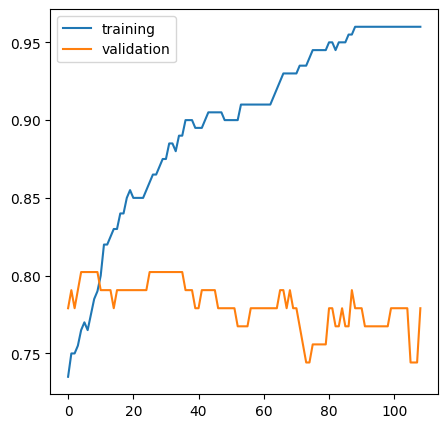

In [59]:
plt.figure(1, figsize=(5,5))
plt.plot(range(len(history.history['accuracy'])), 
         history.history['accuracy'],
         label='training')
plt.plot(range(len(history.history['val_accuracy'])), 
         history.history['val_accuracy'],
         label='validation')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [61]:
y_pred = model.predict(x_scaled_test)

3/3 [==============================] - 0s 2ms/step


Hasil Probabilitas
- jika lebih besar kiri maka mengembalikan 0 
- jika lbeih besar kanan mengembalikan 1

In [62]:
y_pred

array([[9.94978666e-01, 2.21266528e-03],
       [9.58417535e-01, 9.78155285e-02],
       [2.11703703e-01, 7.63575852e-01],
       [9.41002727e-01, 2.25052666e-02],
       [9.79952157e-01, 1.64999720e-02],
       [9.98830199e-01, 1.59576850e-03],
       [8.69253278e-01, 2.16260880e-01],
       [4.77930039e-01, 4.64319646e-01],
       [5.49888015e-01, 5.01582503e-01],
       [9.97846901e-01, 1.93399505e-03],
       [7.62239337e-01, 3.59883070e-01],
       [7.68917859e-01, 1.66309521e-01],
       [7.53013432e-01, 2.64405996e-01],
       [9.63356376e-01, 5.08432910e-02],
       [1.82961319e-02, 9.77574646e-01],
       [4.36879456e-01, 4.62595195e-01],
       [9.62142587e-01, 6.93760999e-03],
       [9.64358807e-01, 1.74284410e-02],
       [9.09811080e-01, 1.01225540e-01],
       [9.89905596e-01, 1.78840216e-02],
       [8.52010489e-01, 3.15392733e-01],
       [9.94171381e-01, 4.75969072e-03],
       [9.33293581e-01, 6.56771064e-02],
       [8.79788220e-01, 1.73079818e-01],
       [4.862301

Untuk Mengembalikkan index hasil prediksi

In [63]:
y_predict = np.argmax(y_pred, axis=1).tolist()
y_predict[0:10]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [64]:
y_aktual = np.argmax(y_test, axis=1).tolist()
y_aktual[0:10]

[0, 0, 1, 0, 1, 0, 0, 0, 0, 0]

Confusion matrixnya

In [65]:
cm = confusion_matrix(y_predict, y_aktual)

In [66]:
print(cm)

[[63 15]
 [ 4  4]]


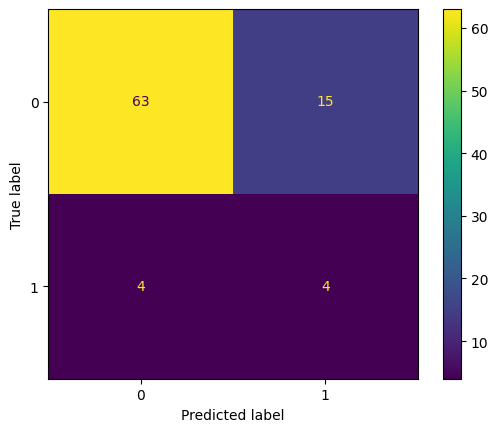

In [67]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Confusion Matrix
- 7 false negative
- 8 true positive
- 57 true negative
- 14 false positive

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_predict, y_aktual))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        78
           1       0.21      0.50      0.30         8

    accuracy                           0.78        86
   macro avg       0.58      0.65      0.58        86
weighted avg       0.87      0.78      0.82        86



- Precision dari semua class yang diprediksi positive berapa jumlah yang benar benar positive hasilnya 
- Recall dari semua class yang positive berapa yang betul betul positive
- f1-score nilai tengah rata rata dari precission dan recall 